In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [21]:
# Load tide data from a CSV file
with open("data.txt", "r") as infile:
    tide_data = infile.read().split("\n")

day = []
time = []
height = []


def militaryTimeToDay(time):
    hour, minute = map(int, time.split(":"))
    return hour / 24 + minute / 1440


for line in tide_data[3:]:
    line = line.lstrip(" ")
    lineData = line.split(" ")
    lineData = [x for x in lineData if x != ""]
    # print(lineData)
    day.append(int(lineData[0]))
    time.append(militaryTimeToDay(lineData[1]))
    height.append(float(lineData[2]))
"""int(lineData[0]) + """
# sets X and Y and Y_error values
x = np.array(time)
y = np.array(height)
y_err = np.full(len(y), 0.25, dtype=np.float32)

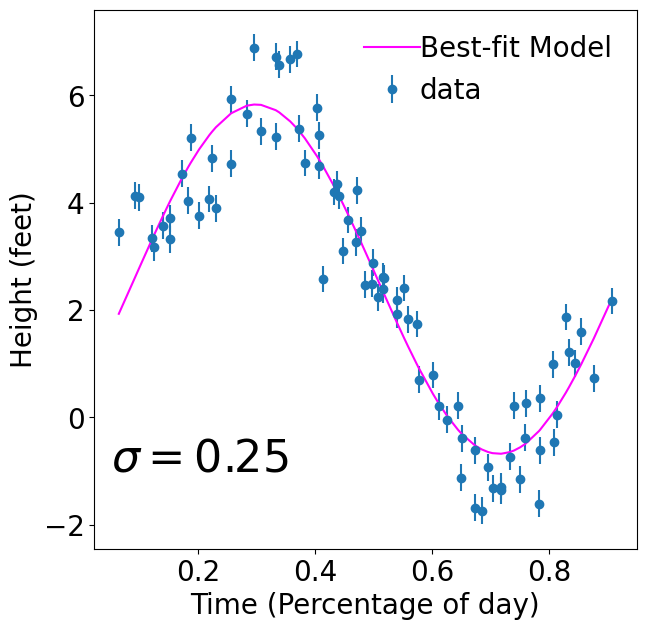

In [22]:
# osolatory function
def osolatory_function(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

#fitting the data
popt, pcov = curve_fit(osolatory_function, x, y, sigma=y_err, absolute_sigma=True)

#modeling the best fit line
x_model = np.sort(x)
y_model = osolatory_function(x_model, *popt)


#ploted the data
f,ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,yerr=y_err,fmt='o',label='data')
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')
"""ax.set_xlim([-0.1,1.1])
ax.set_ylim([-2.5,7.5])"""
ax.text(0.05,-1,r'$\sigma = 0.25$', color='0', fontsize=32)
ax.set_xlabel("Time (Percentage of day)", fontsize=20)
ax.set_ylabel("Height (feet)", fontsize=20)
plt.legend(frameon=False, fontsize=20, handletextpad=0)

In [23]:
#defining the residuals
idx_model = np.argsort(x)
y_data = y[idx_model]
y_model = osolatory_function(x[idx_model], *popt)

residuals = y_data - y_model
residuals = np.array(residuals)
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
print("Mean of the residuals: ", residual_mean)
print("Standard deviation of the residuals: ", residual_std)

def gaussian(x, mu, sigma):
    return 1./(2.*np.pi*sigma**2)**.5 * np.exp(-.5 * ((x - mu) / sigma)**2)

Mean of the residuals:  1.5814826413210395e-10
Standard deviation of the residuals:  0.7342740162468964


82
Standard deviation of the residuals: 0.73
Intrinsic scatter of the residuals: 0.69


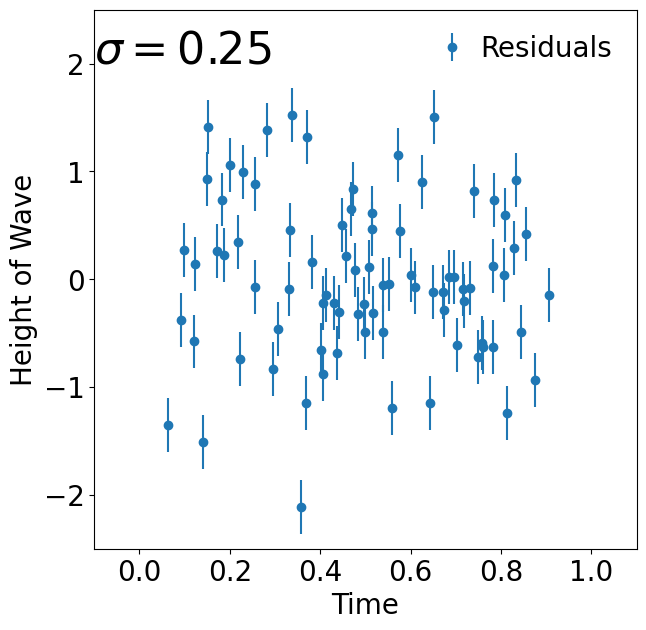

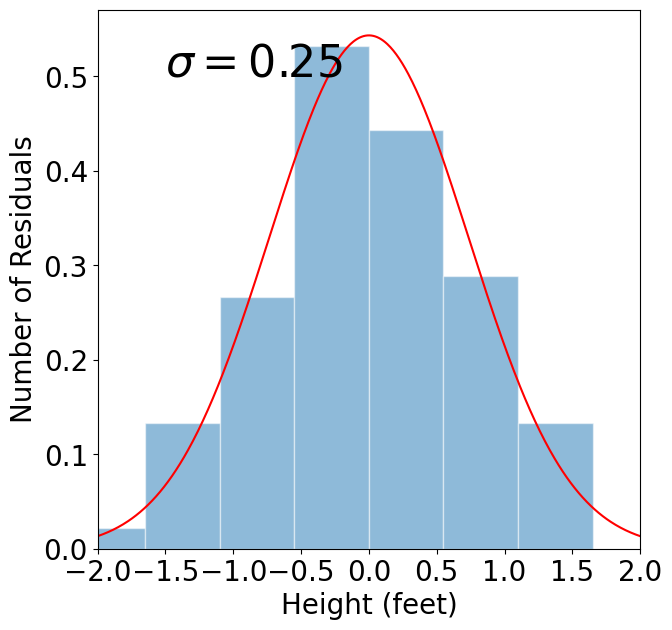

In [24]:
#plotting the residuals
f,ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,residuals,yerr=y_err,fmt='o',label='Residuals')
ax.set_xlim([-0.1,1.1])
ax.set_ylim([-2.5,2.5])
ax.text(-0.1,2,r'$\sigma = 0.25$', color='0', fontsize=32)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Height of Wave", fontsize=20)
plt.legend(frameon=False, fontsize=20, handletextpad=0)


#plotting the residuals with a gaussian curve
f,ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
print(len(residuals))

ax.hist(residuals, bins=10, range=(-2.75,2.75), alpha=0.5, edgecolor="white",density=True)

x_g = np.linspace(-5*residual_std,5*residual_std,1000)
ax.plot(x_g, gaussian(x_g,residual_mean,residual_std), color='red')
ax.set_xlim([-2,2])
ax.text(-1.5,0.5,r'$\sigma = 0.25$', color='0', fontsize=32)
ax.set_xlabel("Height (feet)", fontsize=20)
ax.set_ylabel("Number of Residuals", fontsize=20)

#Intrinsic scatter of the residuals
print(f"Standard deviation of the residuals: {residual_std:.2f}")
print(f"Intrinsic scatter of the residuals: {np.sqrt((residual_std**2 - y_err**2)[0]):.2f}")

Standard deviation of the normal waves: 2.38
Tsunami Standard deviation: 2.42


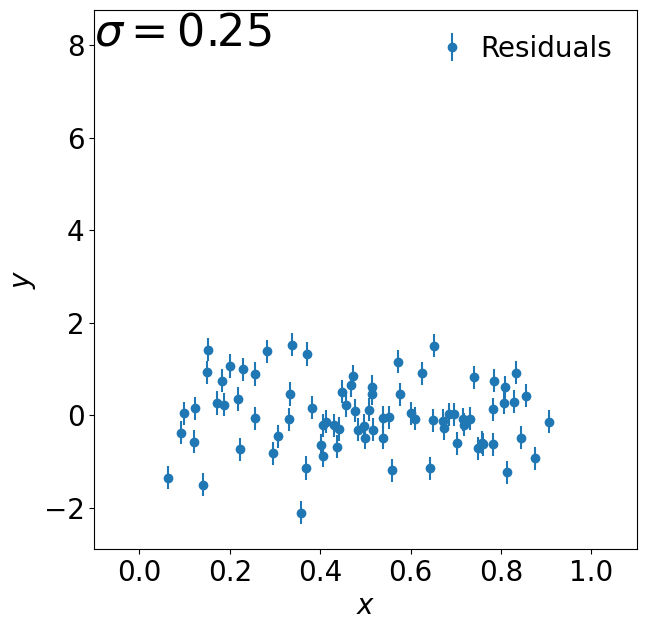

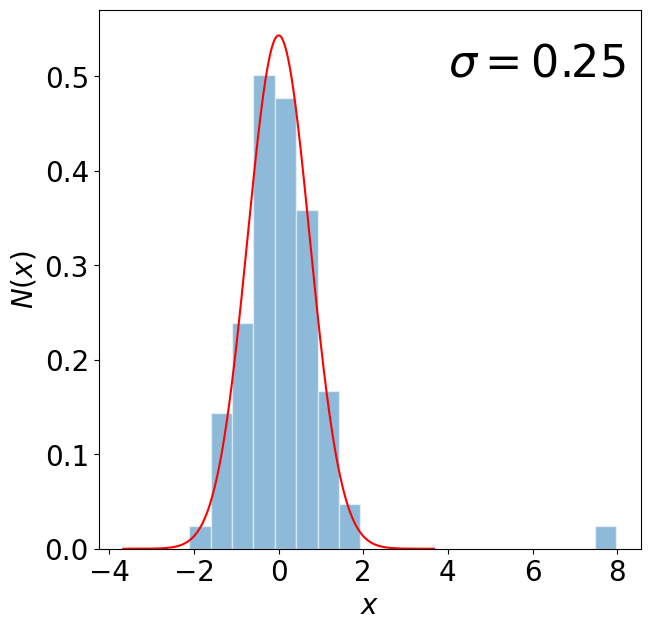

In [25]:
# Added the 2ft increase outlier to the data on janurary 14 during high tide
x_new = np.append(x, 14)
y_new = np.append(y, y[26] + 2)
idx_model = np.argsort(x_new)
y_data_new = y_new[idx_model]
y_model_new = osolatory_function(x_new[idx_model], *popt)
y_err_new = np.full(len(y_new), 0.25, dtype=np.float32)
residuals_new = y_data_new - y_model_new
residuals_new = np.array(residuals_new)

residual_mean_new = np.mean(residuals_new)
residual_std_new = np.std(residuals_new)

#ploted the data with the outlier
f,ax = plt.subplots(1,1,figsize=(7,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x_new,residuals_new,yerr=y_err_new,fmt='o',label='Residuals')
ax.set_xlim([-0.1,1.1])
#ax.set_ylim([-2.5,2.5])
ax.text(-0.1,8,r'$\sigma = 0.25$', color='0', fontsize=32)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
plt.legend(frameon=False, fontsize=20, handletextpad=0)



#plotting the residuals with a gaussian curve with the outlier in a histogram
f, ax = plt.subplots(1, 1, figsize=(7, 7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)

ax.hist(
    residuals_new,
    bins=20,
    alpha=0.5,
    edgecolor="white",
    density=True,
)

x_g = np.linspace(-5 * residual_std, 5 * residual_std, 1000)
ax.plot(x_g, gaussian(x_g, residual_mean, residual_std), color="red")
# ax.set_xlim([-2,2])
ax.text(4, 0.5, r"$\sigma = 0.25$", color="0", fontsize=32)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$N(x)$", fontsize=20)

#Comparing the standard deviation of the normal waves and the outlier
print(f"Standard deviation of the normal waves: {np.std(y):.2f}")
print(f"Tsunami Standard deviation: {np.std(y_new):.2f}")